# Задание

С использованием библиотек Numpy и Pandas написать программу реализующую:

1. Загрузку текстового файла из корневого каталога объемом не менее 20000 символов включая пробелы и все символы.
2. Подсчет частоты встречаемости слов в загруженном файле (критерий схожести слов выбрать самостоятельно).
3. Подсчет длин предложений и их количества.
4. Ввод полученных данных в объект DataFrame и Series, а также отображение полученных результатов в виде таблицы "объекты - признаки".
5. Построение гистограммы частоты встречаемости слов.

p.s. Рекомендую перед решением задания проанализировать задачу и обосновать алгоритм ее решения в текстовом виде. В процессе написания кода использовать комментарии.

# Решение

Решение задачи заключается в использовании подхода лемматизации с использованием библиотеки `spacy`.

In [163]:
import pandas
import spacy
import seaborn
import matplotlib.pyplot as mplot
import regex as re
from string import punctuation

In [164]:
# подготавливаем модель
nlp = spacy.load('en_core_web_md')

In [165]:
# читаем текст из файла и удаляем мусор
path_to_text = input("Enter path to text: ")
with open(path_to_text) as f:
    text = f.read()

text = " ".join(re.sub(r'\[[0-9]+\]', '', text).split())

nlp.Defaults.stop_words.add("de")

doc = nlp(text)

Enter path to text: text.txt


In [166]:
# извлекаем предложения и считаем их длину
def sentence_len(sentence):
    sent_len = 0
    for token in sentence:
        if token.text not in punctuation:
            sent_len += 1
    
    return sent_len

sentences = list((sentence, sentence_len(sentence)) for sentence in doc.sents)

print("Sentences count: ", len(sentences))

Sentences count:  714


In [167]:
# считаем кол-во встречаемых слов

freq_dict = {}

for token in doc:
    if not token.is_stop:
        if token.text not in punctuation:
            lemma_str = token.lemma_.lower()
            if lemma_str in freq_dict.keys():
                freq_dict[lemma_str] += 1
            else:
                freq_dict[lemma_str] = 1



In [168]:
# сортируем по кол-ву
freqs_list = sorted(freq_dict.items(), key=lambda x:x[1])
freqs_list.reverse()
freq_dict = dict(freqs_list)

# конструируем объект DataFrame с полученными данными
word_freqs_df = pandas.DataFrame({"Words": freq_dict.keys(), "Counts": freq_dict.values()})
word_freqs_df

,Words,Counts
0,johnson,433
1,say,77
2,conservative,77
3,party,73
4,london,70
...,...,...
3039,share,1
3040,snap,1
3041,controversially,1
3042,prominent,1


<AxesSubplot:xlabel='Words', ylabel='Counts'>

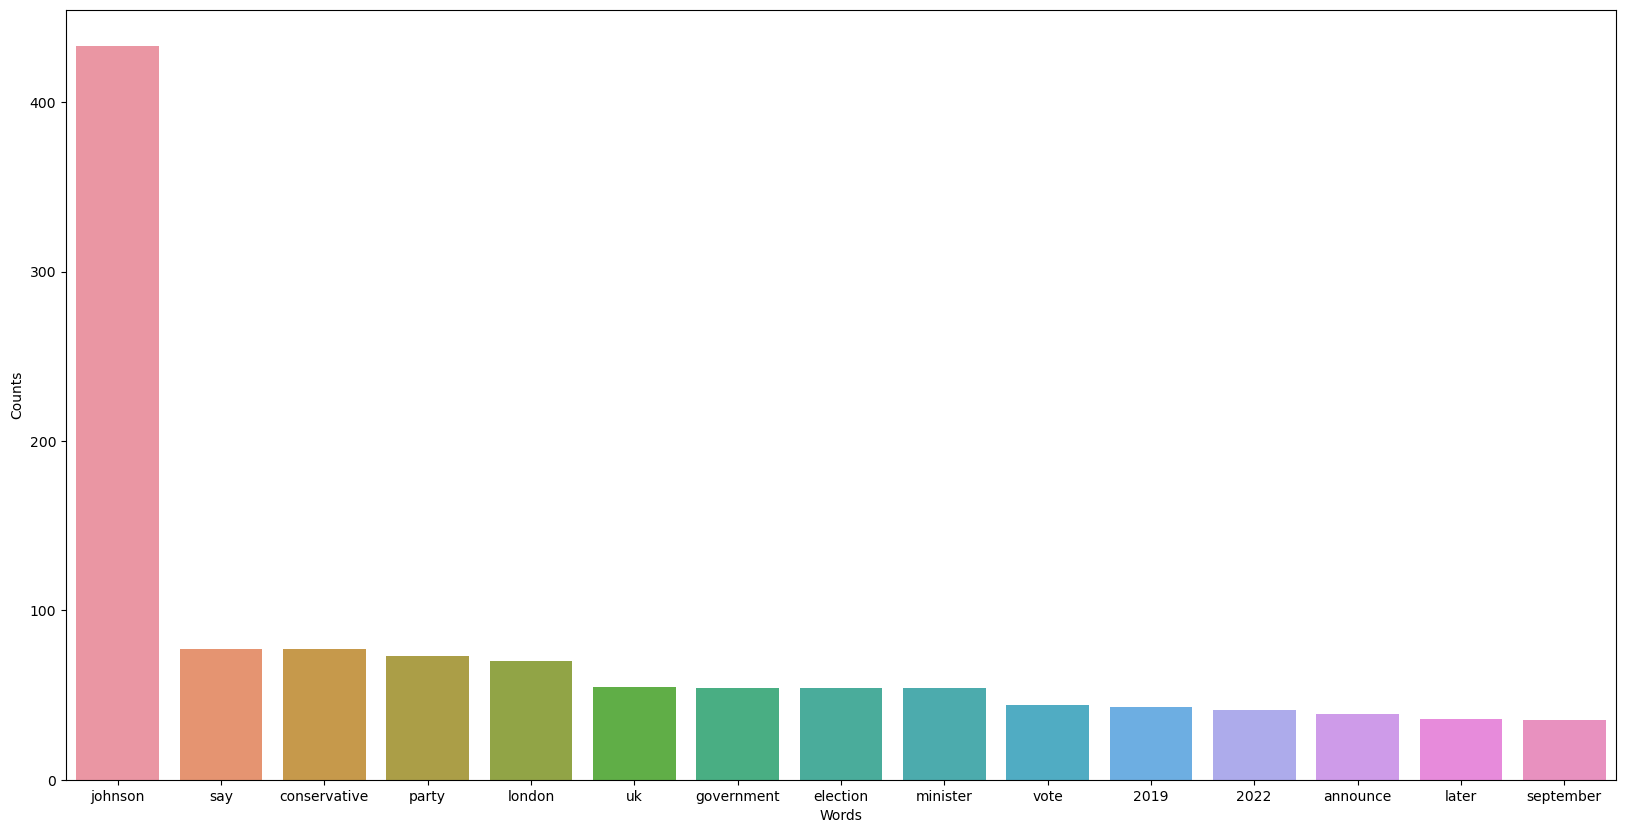

In [169]:
# показываем на гистограмме самые часто встречаемые слова
count = 15
mplot.figure(figsize=(count+5,10))
seaborn.barplot(x=word_freqs_df['Words'].head(count), y=word_freqs_df['Counts'].head(count))